# Regression

In [1]:
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm

In [2]:
df = pd.read_csv('clean_ravdess_dm1.csv', skipinitialspace=True)
df.drop(['Unnamed: 0'], inplace=True, axis=1)
y = np.array(df["emotion"])
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,mfcc_mean,mfcc_std,mfcc_max,...,stft_kur,stft_skew,mean,std,min,kur,skew,intFill,zcs_log,length_ms_log
0,speech,fearful,normal,Dogs are sitting by the door,2nd,2.0,F,-33.485947,134.654860,171.69092,...,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,9.406061,0.273153,-36.793432,4.230321,3.572523
1,speech,angry,normal,Dogs are sitting by the door,1st,16.0,F,-29.502108,130.485630,205.00770,...,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,19.564187,0.292157,-33.816810,4.143202,3.591510
2,speech,happy,strong,Dogs are sitting by the door,2nd,16.0,F,-30.532463,126.577110,165.45653,...,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,4.881241,0.302659,-32.290737,4.272375,3.669410
3,song,surprised,normal,Kids are talking by the door,1st,14.0,F,-36.059555,159.725160,190.03609,...,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,13.040259,-0.081014,-49.019839,4.065094,3.560743
4,song,happy,strong,Dogs are sitting by the door,2nd,2.0,F,-31.405996,122.125824,161.13400,...,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,7.485109,0.414872,-31.214503,4.180040,3.643847


In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,2436,2437,2438,2439,2440,2441,2442,2443,2444,2445
vocal_channel,speech,speech,speech,song,song,speech,speech,song,speech,song,...,song,speech,speech,song,speech,song,speech,speech,speech,speech
emotion,fearful,angry,happy,surprised,happy,angry,calm,sad,calm,calm,...,happy,angry,fearful,happy,neutral,sad,calm,neutral,surprised,surprised
emotional_intensity,normal,normal,strong,normal,strong,normal,normal,strong,normal,strong,...,normal,strong,strong,strong,normal,strong,normal,normal,strong,normal
statement,Dogs are sitting by the door,Dogs are sitting by the door,Dogs are sitting by the door,Kids are talking by the door,Dogs are sitting by the door,Dogs are sitting by the door,Dogs are sitting by the door,Dogs are sitting by the door,Dogs are sitting by the door,Kids are talking by the door,...,Dogs are sitting by the door,Dogs are sitting by the door,Dogs are sitting by the door,Kids are talking by the door,Kids are talking by the door,Kids are talking by the door,Kids are talking by the door,Kids are talking by the door,Dogs are sitting by the door,Kids are talking by the door
repetition,2nd,1st,2nd,1st,2nd,1st,1st,2nd,1st,1st,...,2nd,1st,2nd,2nd,2nd,2nd,1st,2nd,1st,1st
actor,2.0,16.0,16.0,14.0,2.0,2.0,12.0,12.0,6.0,6.0,...,13.0,19.0,19.0,5.0,19.0,3.0,7.0,17.0,19.0,19.0
sex,F,F,F,F,F,F,F,F,F,F,...,M,M,M,M,M,M,M,M,M,M
mfcc_mean,-33.485947,-29.502108,-30.532463,-36.059555,-31.405996,-30.177172,-33.899364,-29.462296,-34.11762,-34.821735,...,-27.378132,-23.191303,-26.23655,-28.4094,-26.366121,-22.787794,-28.68281,-25.771196,-25.815453,-28.242815
mfcc_std,134.65486,130.48563,126.57711,159.72516,122.125824,139.50746,159.19762,116.833786,165.02167,164.23001,...,131.38835,103.81055,111.367516,136.80605,149.74036,113.3493,154.49243,157.2419,147.11678,159.9434
mfcc_max,171.69092,205.0077,165.45653,190.03609,161.134,228.32715,207.63217,167.96753,189.05966,153.92604,...,201.06873,175.24634,184.78807,225.15775,236.99867,202.85928,197.39696,251.22853,214.5697,219.8435


In [4]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=100)

print(df_train.shape, df_test.shape)

(1712, 29) (734, 29)


In [5]:
Xvar = 'intFill'
Yvar = 'min'     #variables choice

In [6]:
x_train = df_train[Xvar].values.reshape(-1, 1)
y_train = df_train[Yvar].values

x_test = df_test[Xvar].values.reshape(-1, 1)
y_test = df_test[Yvar].values

## Linear regression

#### intFill and std

In [54]:
reg = LinearRegression()
reg.fit(x_train, y_train)

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-0.01692109]
Intercept: 
 -0.8005210214474257


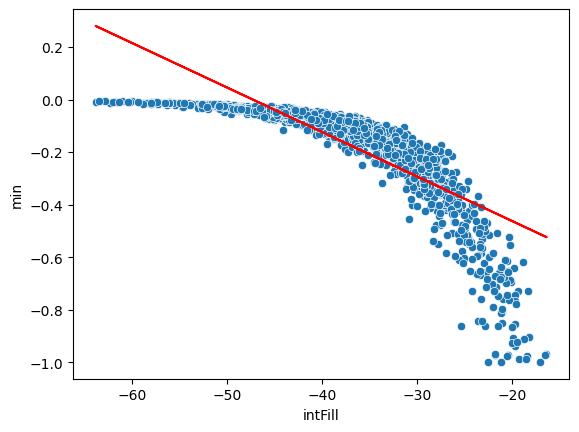

In [8]:
sns.scatterplot(data=df_train, x=Xvar, y=Yvar)
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")
plt.show()

In [9]:
y_pred = reg.predict(x_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.677
MSE: 0.009
MAE: 0.069


In [10]:
X = df['intFill']
Y = df['min']

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    min   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     4737.
Date:                Sun, 25 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:57:40   Log-Likelihood:                 2103.5
No. Observations:                2446   AIC:                            -4203.
Df Residuals:                    2444   BIC:                            -4191.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8030      0.009    -84.562      0.0

### Ridge

Coefficients: 
 [-0.01692095]
Intercept: 
 -0.8005158405444057


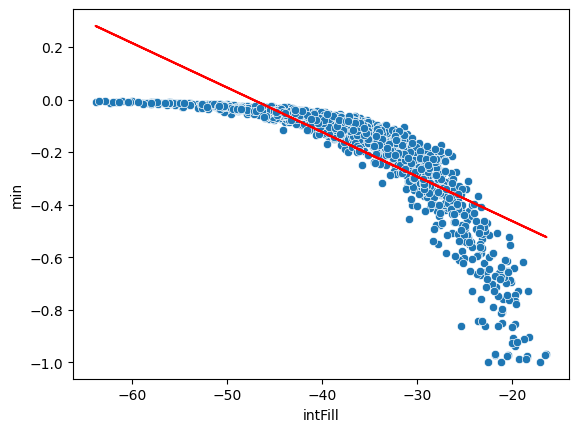

R2: 0.677
MSE: 0.009
MAE: 0.069


In [11]:
reg = Ridge()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

sns.scatterplot(data=df_train, x=Xvar, y=Yvar)
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")
plt.show()

y_pred = reg.predict(x_test)   #scores
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

### Lasso

Coefficients: 
 [-0.0029735]
Intercept: 
 -0.2763361118464801


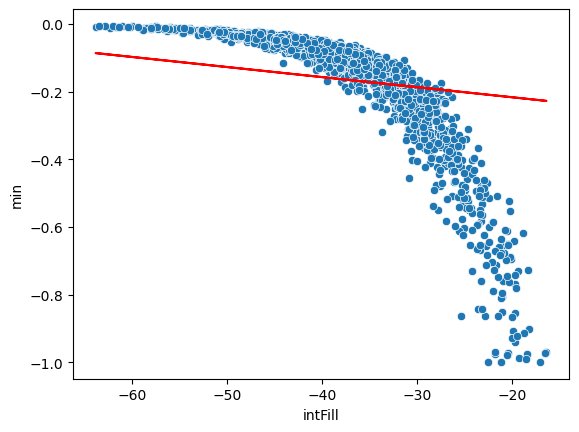

R2: 0.214
MSE: 0.023
MAE: 0.103


In [12]:
reg = Lasso()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

sns.scatterplot(data=df_train, x=Xvar, y=Yvar)
plt.plot(x_train, reg.coef_[0]*x_train+reg.intercept_, c="red")
plt.show()

y_pred = reg.predict(x_test)    #scores
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

In [57]:
x = df[['intFill','mfcc_std']]
y = df['min']
 
# with sklearn
regr = LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.p0redict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -1.0067659348883078
Coefficients: 
 [-0.00670569  0.00431387]
                            OLS Regression Results                            
Dep. Variable:                    min   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     2483.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:21:46   Log-Likelihood:                 2142.4
No. Observations:                2446   AIC:                            -4279.
Df Residuals:                    2443   BIC:                            -4261.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [63]:
regr = Ridge()
regr.fit(x, y)
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)


x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Coefficients: 
 [ 0.         -0.00670501  0.00431414]
Intercept: 
 -1.0067772460163127
                            OLS Regression Results                            
Dep. Variable:                    min   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     2483.
Date:                Mon, 26 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:30:27   Log-Likelihood:                 2142.4
No. Observations:                2446   AIC:                            -4279.
Df Residuals:                    2443   BIC:                            -4261.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [72]:
reg = Lasso()
reg.fit(x_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

x = sm.add_constant(x) # adding a constant
 
penalty=np.array([0.5,0.5,0.5])    
model = ols = sm.OLS(y, x).fit_regularized(L1_wt=0., alpha=penalty)
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Coefficients: 
 [-0.0029735]
Intercept: 
 -0.2763361118464801


NotImplementedError: 

## Non-linear regression

### Decision tree regressor

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
reg = DecisionTreeRegressor(min_samples_leaf=0.01,ccp_alpha=0.00005)     #need to play with parameters(ccp_alpha)

reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=5e-05, min_samples_leaf=0.01)

In [12]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.903
MSE: 0.003
MAE: 0.034


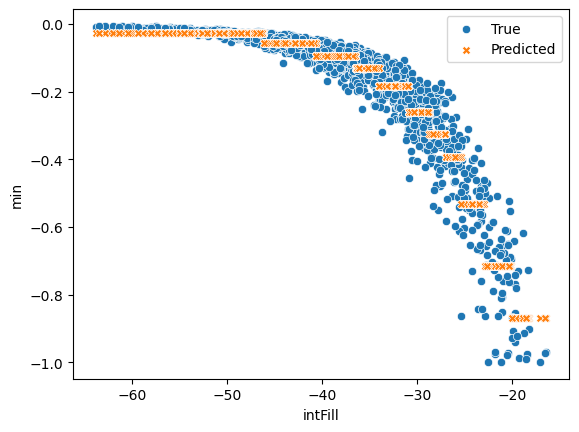

In [13]:
sns.scatterplot(data=df_train, x=Xvar, y=Yvar, label="True")
sns.scatterplot(data=df_train, x=Xvar, y=reg.predict(x_train), label="Predicted", marker="X")
plt.legend()
plt.show()

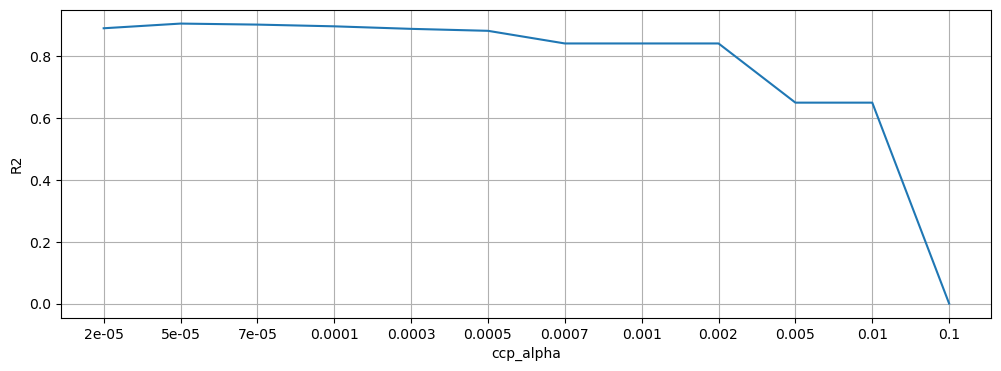

In [76]:
#parameters
ccp_alphas = [0.00002, 0.00005, 0.00007, 0.0001, 0.0003, 0.0005, 0.0007, 0.001, 0.002, 0.005, 0.01, 0.1]
scores = list()
for ccp_alpha in ccp_alphas:
    dr = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    dr.fit(x_train, y_train)
    y_pred = dr.predict(x_test)
    scores.append(r2_score(y_test, y_pred))
plt.figure(figsize=(12,4))
plt.plot(scores)
plt.xticks(range(len(ccp_alphas)), ccp_alphas)
plt.grid()
plt.xlabel("ccp_alpha")
plt.ylabel("R2")
plt.show()

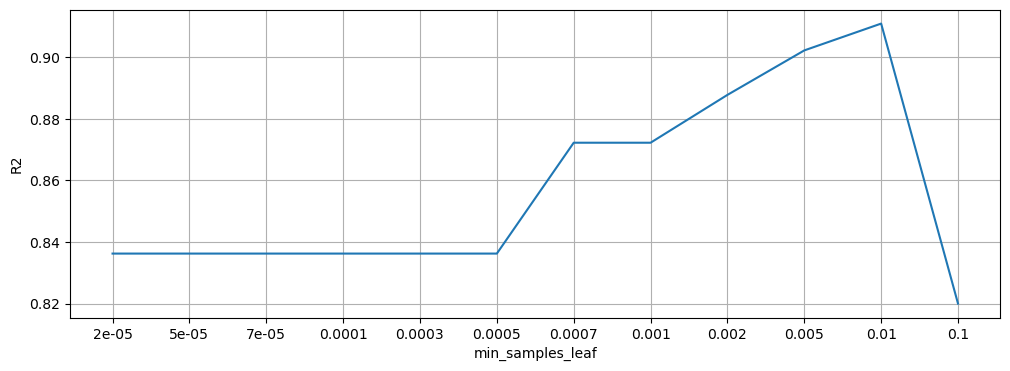

In [79]:
min_samples_leafs = [0.00002, 0.00005, 0.00007, 0.0001, 0.0003, 0.0005, 0.0007, 0.001, 0.002, 0.005, 0.01, 0.1]
scores = list()
for min_samples_leaf in min_samples_leafs:
    dr = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
    dr.fit(x_train, y_train)
    y_pred = dr.predict(x_test)
    scores.append(r2_score(y_test, y_pred))
plt.figure(figsize=(12,4))
plt.plot(scores)
plt.xticks(range(len(min_samples_leafs)), min_samples_leafs)
plt.grid()
plt.xlabel("min_samples_leaf")
plt.ylabel("R2")
plt.show()

### KNN regressor

In [84]:
from sklearn.neighbors import KNeighborsRegressor

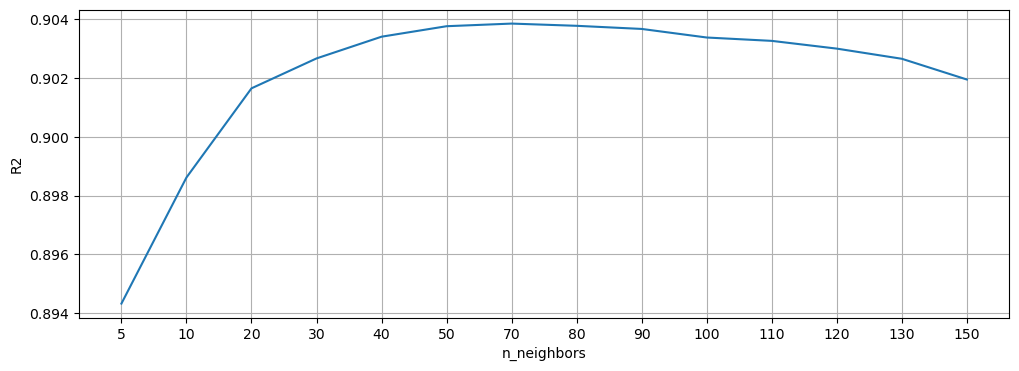

In [87]:
n_neighborses = [5, 10, 20, 30, 40, 50, 70, 80, 90, 100,110,120,130,150]
scores = list()
for n_neighbors in n_neighborses:
    dr = KNeighborsRegressor(weights='distance',n_neighbors=n_neighbors)
    dr.fit(x_train, y_train)
    y_pred = dr.predict(x_test)
    scores.append(r2_score(y_test, y_pred))
plt.figure(figsize=(12,4))
plt.plot(scores)
plt.xticks(range(len(n_neighborses)), n_neighborses)
plt.grid()
plt.xlabel("n_neighbors")
plt.ylabel("R2")
plt.show()

In [94]:
reg = KNeighborsRegressor(weights='distance',n_neighbors=60)

reg.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=60, weights='distance')

R2: 0.904
MSE: 0.003
MAE: 0.033


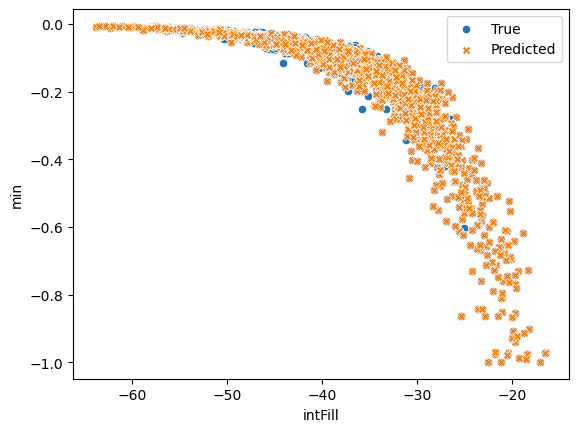

In [95]:
y_pred = reg.predict(x_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

sns.scatterplot(data=df_train, x=Xvar, y=Yvar, label="True")
sns.scatterplot(data=df_train, x=Xvar, y=reg.predict(x_train), label="Predicted", marker="X")
plt.legend()
plt.show()

# Multivariate regression

In [16]:
#variables choice
Xvar = 'zcs_log'
Zvar = 'intFill'
Yvar = 'min'    #variable to be predicted 

X_train = df_train[[Xvar, Zvar]].values
y_train = df_train[Yvar].values

X_test = df_test[[Xvar, Zvar]].values
y_test = df_test[Yvar].values

## Linear regression

R2: 0.677
MSE: 0.009
MAE: 0.069
variables: zcs_log and intFill, to predict min


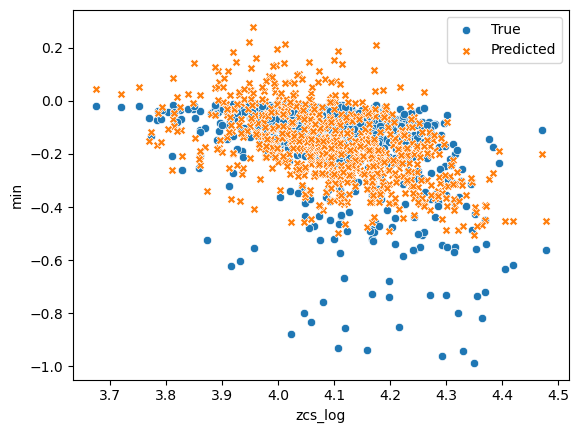

In [19]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))
print('variables: {} and {}, to predict {}'.format(Xvar, Zvar, Yvar))

sns.scatterplot(data=df_test, x=Xvar, y=Yvar, label="True")
sns.scatterplot(data=df_test, x=Xvar, y=reg.predict(X_test), label="Predicted", marker="X")
plt.legend()
plt.show()

In [21]:
X = df[['zcs_log','intFill']]
Y = df['min']

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    min   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     2368.
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:55:52   Log-Likelihood:                 2103.6
No. Observations:                2446   AIC:                            -4201.
Df Residuals:                    2443   BIC:                            -4184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7742      0.084     -9.181      0.0

## Non-linear regression

In [22]:
reg = DecisionTreeRegressor()   #ccp_alpha?

reg.fit(X_train, y_train)

DecisionTreeRegressor()

R2: 0.835
MSE: 0.005
MAE: 0.042


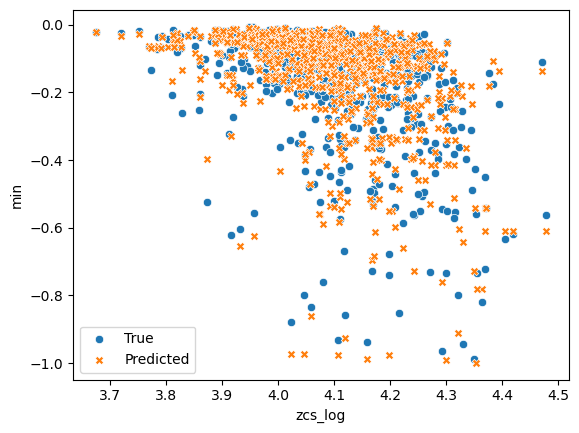

In [23]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

sns.scatterplot(data=df_test, x=Xvar, y=Yvar, label="True")
sns.scatterplot(data=df_test, x=Xvar, y=reg.predict(X_test), label="Predicted", marker="X")
plt.legend()
plt.show()

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
scatter1=ax.scatter(Xsong_minmax[:,0],Xsong_minmax[:,1], Xsong_minmax[:,2], Xsong_minmax[:,3], c=bkmeans.labels_, s=20)
ax.view_init(azim=250)
legend1 = ax.legend(*[scatter1.legend_elements()[0],['0','1','2','3']], 
                    title="Legend", loc='upper left')
plt.show()